# CNNs


### Plot Data

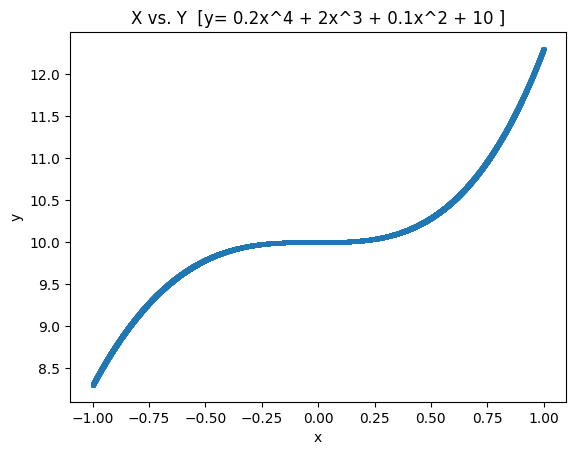

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def y_function(x):
    return 0.2*x**4+2*x**3+0.1*x**2+10

def create_samples(num_of_samples):
    x = np.random.uniform(-1, 1, num_of_samples)
    y= y_function(x)
    return x, y

def plot_graph(x,y,x_label,y_label,title):
    plt.scatter(x,y,s=6)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print("\n")

#create 30,000 samples and plot the resultant graph
x,y=create_samples(30000)
plot_graph(x,y,"x","y","X vs. Y  [y= 0.2x^4 + 2x^3 + 0.1x^2 + 10 ]")

### Shuffle Data

In [ ]:
def shuffle_data(argument=None):
    #generate x and y
    x,y=create_samples(30000)
    #generate the data variable via merging x and y
    data = np.column_stack((x, y))
    #shuffle the data if the argument matches
    if argument  == 'shuffle':
       print("Data Shuffled")
       np.random.shuffle(data)
    return data[:, 0], data[:, 1]


###Split Data

In [ ]:
def split_data(x,y,train_ratio=0.4,validation_ratio=0.1,test_ratio=0.5):
    data_size = len(x)
    train_size = int(data_size*train_ratio)
    val_size = int(data_size*validation_ratio)
    #training data
    x_train = x[:train_size]
    y_train = y[:train_size]
    #validation data
    x_val = x[train_size:train_size+val_size]
    y_val = y[train_size:train_size+val_size]
    #test size
    x_test = x[train_size+val_size:]
    y_test = y[train_size+val_size:]
    return (x_train,y_train),(x_val,y_val),(x_test,y_test)

#testing
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([11,21,31,41,51,61,71,81,91,101])
train,val,test=split_data(x,y)
print("training data:")
print(train[0])
print(train[1])
print("validation:")
print(val[0])
print(val[1])
print("testing:")
print(test[0])
print(test[1])

training data:
[1 2 3 4]
[11 21 31 41]
validation:
[5]
[51]
testing:
[ 6  7  8  9 10]
[ 61  71  81  91 101]


### Scale Data

In [ ]:
#scale data between 0 and 1
def scale_data(x, y):
    x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x))
    y_scaled = (y- np.min(y)) / (np.max(y) - np.min(y))
    return x_scaled, y_scaled

#testing
x = np.array([1,2,3,4])
y = np.array([12,22,32,42])


### Error Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def calculate_stats(actual_y,predicted_y):
    MAE=mean_absolute_error(actual_y,predicted_y)
    print("MAE: ", MAE)
    MSE=mean_squared_error(actual_y,predicted_y)
    print("MSE: ", MSE)
    RMSE=MSE**0.5
    print("RMSE: ", RMSE)
    R2_score=r2_score(actual_y,predicted_y)
    print("R2 SCORE: ", R2_score)
    return MAE,MSE,RMSE,R2_score


### Structure 1 and Structure 2 + initialize predefined conditions

In [ ]:
import tensorflow as tf

#structure 1
#first hidden layer: 12 units
#second hidden layer: 8 units
#last hidden layer: 4 units
def structure_1(act_func):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation=act_func),
        tf.keras.layers.Dense(8, activation=act_func),
        tf.keras.layers.Dense(4, activation=act_func),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

#structure 2
#first hidden layer: 24 units
def structure_2(act_func):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(24, activation=act_func),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

#initialize predefined conditions
number_of_epochs =20
batch_size = 12

#take care of all the possible mutations of the data
#0
def get_shuffled_unscaled_data(train_ratio=0.3,val_ratio=0.2,test_ratio=0.5):
    #create data
    x,y=shuffle_data('shuffle')
    #split data
    train,val,test=split_data(x,y,train_ratio,val_ratio,test_ratio)
    return train,val,test
#1
def get_shuffled_scaled_data(train_ratio=0.3,val_ratio=0.2,test_ratio=0.5):
    #create data
    x,y=shuffle_data('shuffle')
    #split data
    train,val,test=split_data(x,y,train_ratio,val_ratio,test_ratio)
    #scale data
    x_train,y_train = scale_data(train[0],train[1])
    x_val,y_val = scale_data(val[0],val[1])
    x_test,y_test = scale_data(test[0],test[1])
    return (x_train,y_train),(x_val,y_val),(x_test,y_test)
#2
def get_unshuffled_unscaled_data(train_ratio=0.3,val_ratio=0.2,test_ratio=0.5):
    #create data
    x,y=shuffle_data()
    #split data
    train,val,test=split_data(x,y,train_ratio,val_ratio,test_ratio)
    return train,val,test
#3
def get_unshuffled_scaled_data(train_ratio=0.3,val_ratio=0.2,test_ratio=0.5):
    #create data
    x,y=shuffle_data()
    #split data
    train,val,test=split_data(x,y,train_ratio,val_ratio,test_ratio)
    #scale data
    x_train,y_train = scale_data(train[0],train[1])
    x_val,y_val = scale_data(val[0],val[1])
    x_test,y_test = scale_data(test[0],test[1])
    return (x_train,y_train),(x_val,y_val),(x_test,y_test)

def create_structure(structure_number,act_func,mutation_number,number_of_epochs,batch_size,case_number):
    title="[Case:"+str(case_number)+"] "
    #choose from the different variation of scaled/shuffeled data
    if mutation_number==0:
      title = title+"[Shuffled+Unscaled]"
      train,val,test=get_shuffled_unscaled_data()
    elif mutation_number==1:
      title = title+"[Shuffled+Scaled]"
      train,val,test=get_shuffled_scaled_data()
    elif mutation_number==2:
      title = title+"[Unshuffled+Unscaled]"
      train,val,test=get_unshuffled_unscaled_data()
    elif mutation_number==3:
      title =title+ "[Unshuffled+Scaled]"
      train,val,test=get_unshuffled_scaled_data()
    #reshape train x
    train_x_reshaped = train[0].reshape(-1, 1)
    #create structure based on structure number
    if structure_number==1:
      title =title +" [Structure 1]"+" [func:"+act_func+"]"
      model=structure_1(act_func)
    elif structure_number==2:
      title =title +" [Structure 2]"+" [func:"+act_func+"]"
      model=structure_2(act_func)
    #fit
    model_history=model.fit(train_x_reshaped,train[1], number_of_epochs, batch_size, validation_data=(val[0], val[1]),verbose=0)
    #predict
    y_predicted = model.predict(test[0])
    #plot graph x test vs y test
    plot_graph(test[0],test[1],'x_test','y_test','x_test vs. y_test '+title)
    #plot graph x test vs y predicted
    plot_graph(test[0],y_predicted,'x_test','y_predicted','x_test vs. y_predicted '+title)
    #print loss
    stats=calculate_stats(test[1],y_predicted)


###Case 1:
- Data: Use shuffled and unscaled data.
- NN structure: Structure 1.
- Activation function: Relu.

Data Shuffled
469/469 [==============================] - 1s 1ms/step


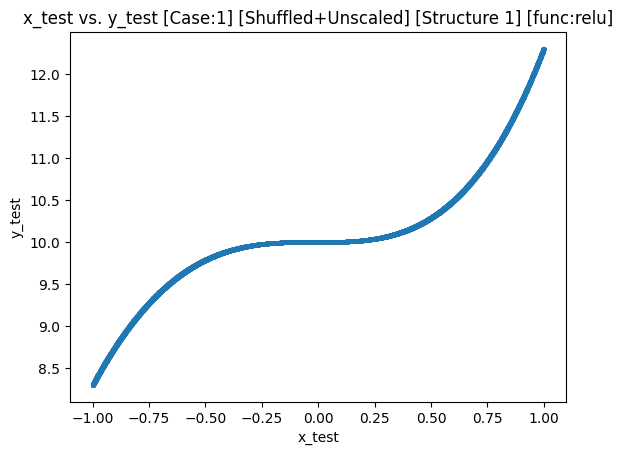

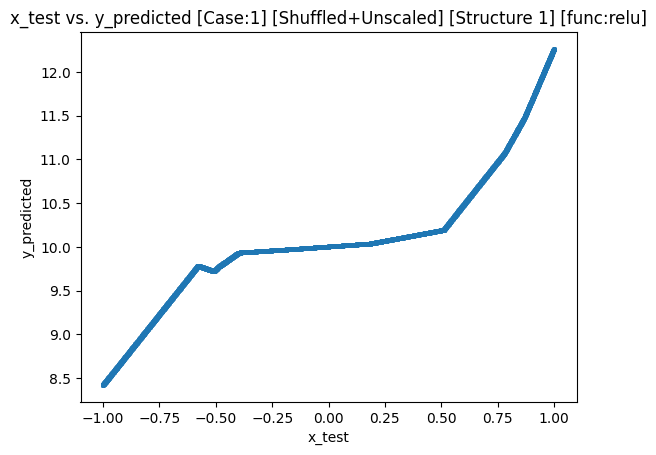



MAE:  0.02705916848809457
MSE:  0.0013117702178892558
RMSE:  0.036218368515012596
R2 SCORE:  0.9977292438472648


In [ ]:
create_structure(1,'relu',0,number_of_epochs,batch_size,1)

469/469 [==============================] - 1s 1ms/step


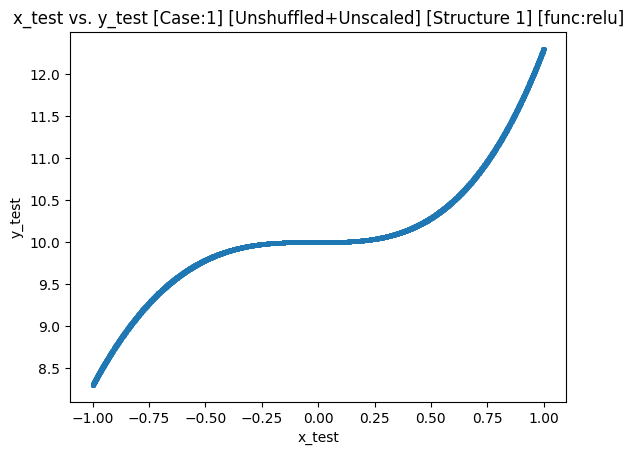

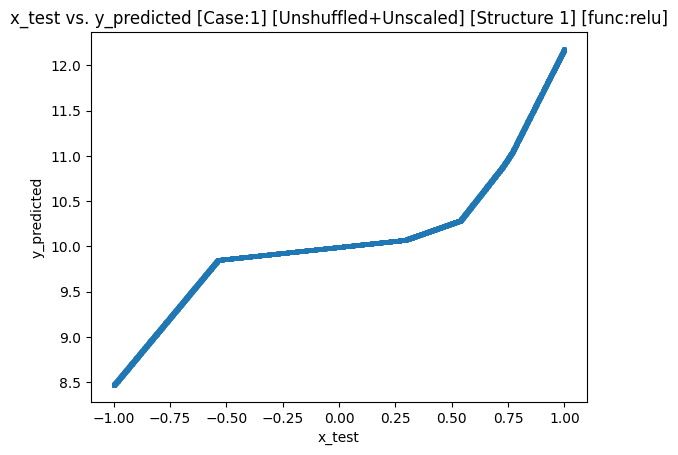



MAE:  0.033519234308239776
MSE:  0.0018048438643136528
RMSE:  0.04248345400639704
R2 SCORE:  0.9968613362309257


In [ ]:
#data not shuffled + unscaled
create_structure(1,'relu',2,number_of_epochs,batch_size,1)

### Case 2:
- Data: Use shuffled and unscaled data.
- NN structure: Structure 2.
- Activation function: Relu

Data Shuffled
469/469 [==============================] - 1s 1ms/step


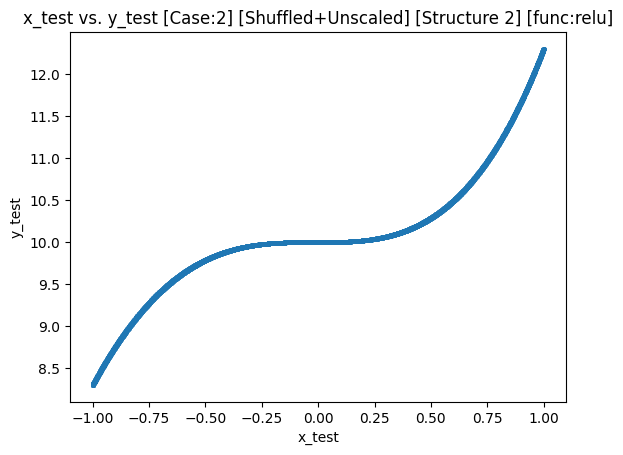

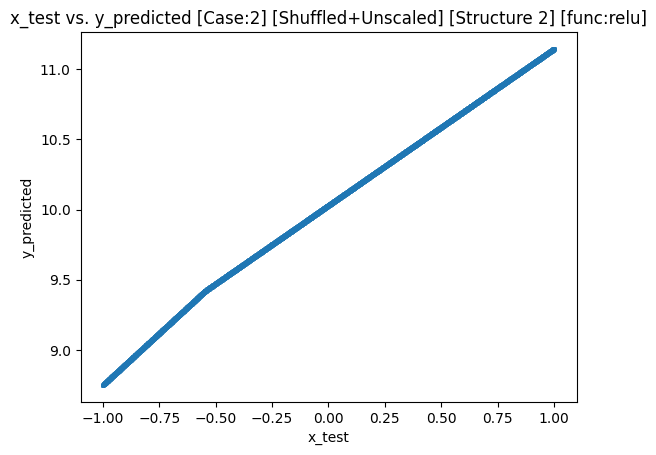



MAE:  0.25449226528583985
MSE:  0.10088996638768621
RMSE:  0.3176318094707868
R2 SCORE:  0.8258389902203763


In [ ]:
create_structure(2,'relu',0,number_of_epochs,batch_size,2)

469/469 [==============================] - 1s 1ms/step


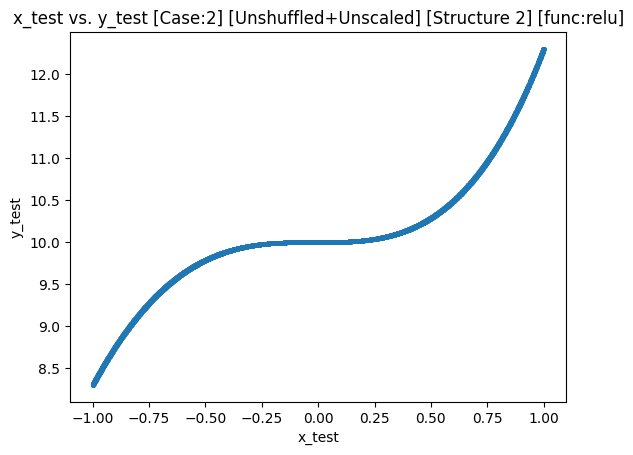

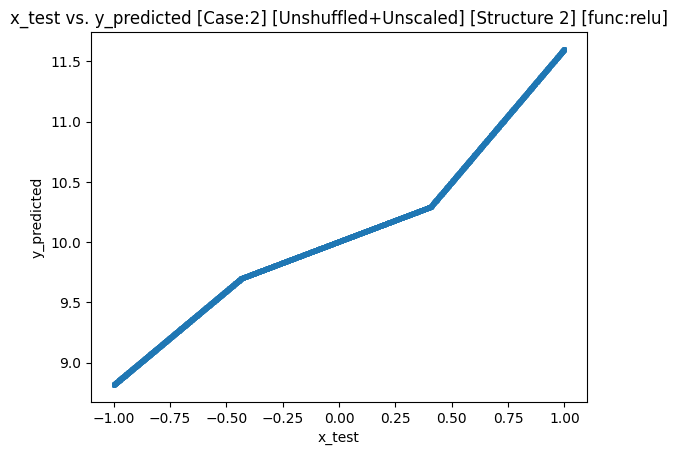



MAE:  0.1620223223762346
MSE:  0.03855265419940312
RMSE:  0.1963482981831091
R2 SCORE:  0.933038429619305


In [ ]:
#all prev condition + unshuffled data
create_structure(2,'relu',2,number_of_epochs,batch_size,2)

### Case 3:
- Data: Use shuffled and unscaled data.
- NN structure: Structure 1.
- Activation function: tanh

Data Shuffled
469/469 [==============================] - 1s 1ms/step


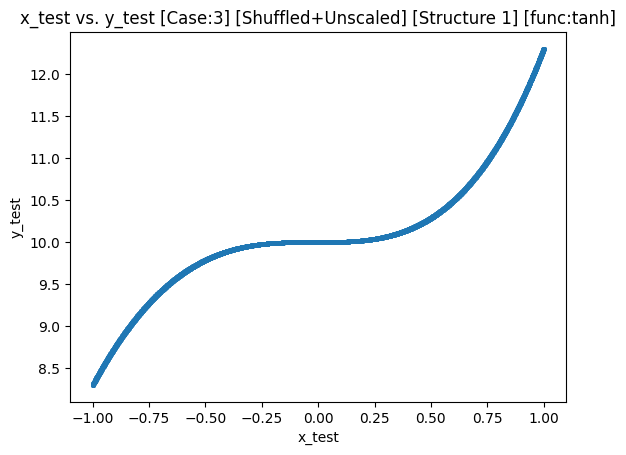

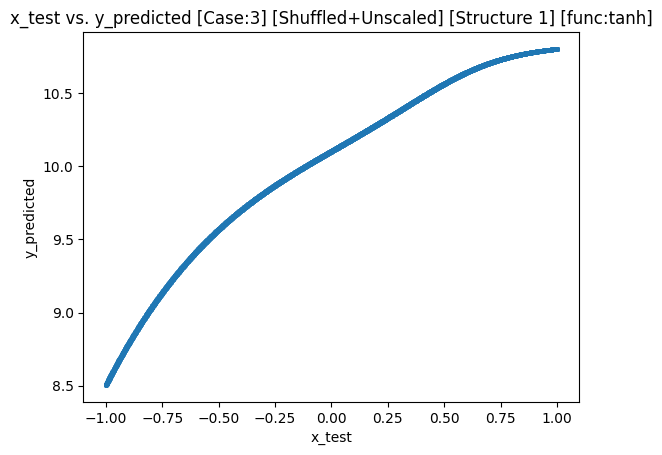



MAE:  0.24665338143793034
MSE:  0.1272569570249169
RMSE:  0.3567309308497329
R2 SCORE:  0.7806332177373032


In [ ]:
create_structure(1,'tanh',0,number_of_epochs,batch_size,3)

469/469 [==============================] - 1s 1ms/step


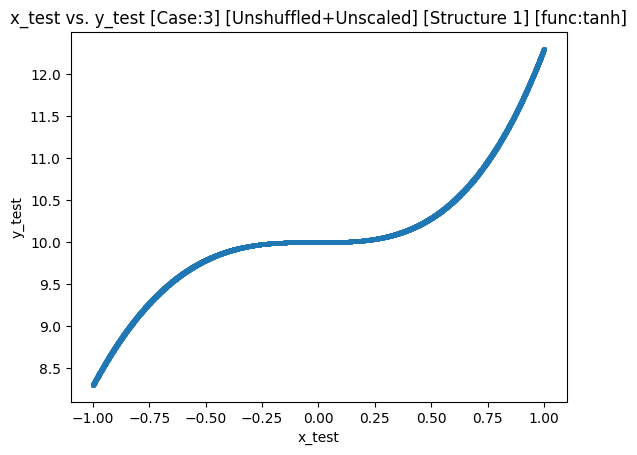

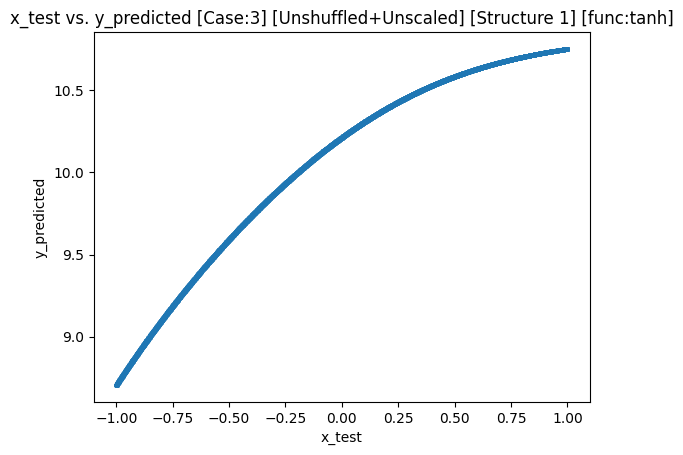



MAE:  0.28067885156960953
MSE:  0.15507083582001369
RMSE:  0.39379034500608784
R2 SCORE:  0.7341034368073024


In [ ]:
create_structure(1,'tanh',2,number_of_epochs,batch_size,3)

### Case 4:
- Data: Use shuffled and scaled data. First, shuffle the data then split the data and finally
scale the data (both x and y).
- NN structure: Structure 1.
- Activation function: Relu

Data Shuffled
469/469 [==============================] - 1s 1ms/step


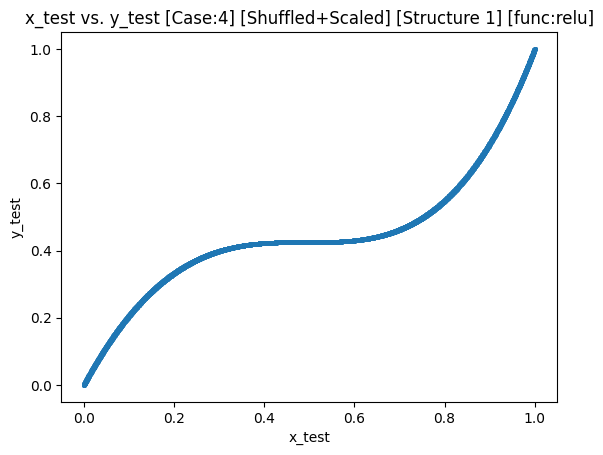

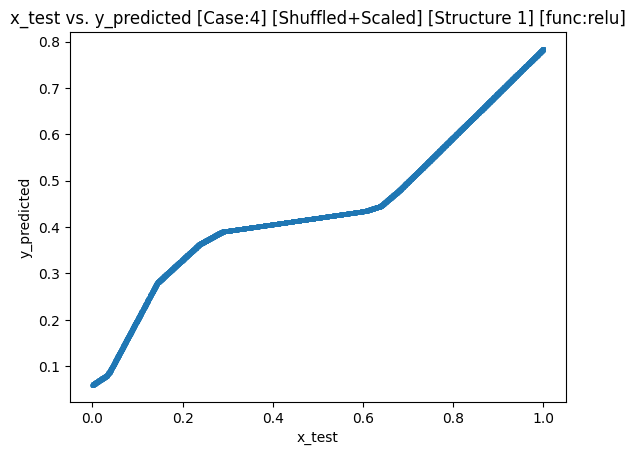



MAE:  0.024258481938009474
MSE:  0.0019324718501610983
RMSE:  0.04395988910542312
R2 SCORE:  0.9462928352388115


In [ ]:
create_structure(1,'relu',1,number_of_epochs,batch_size,4)

469/469 [==============================] - 1s 1ms/step


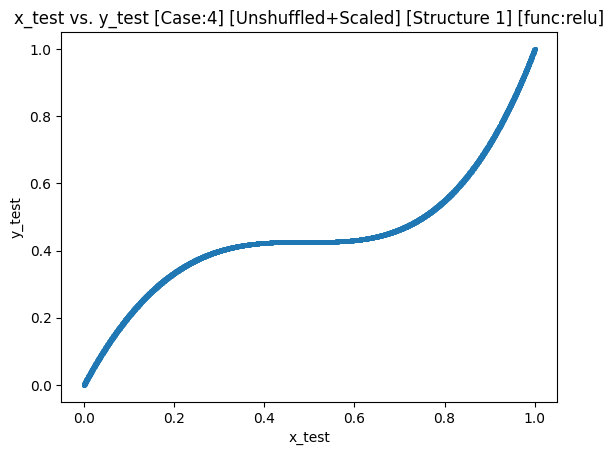

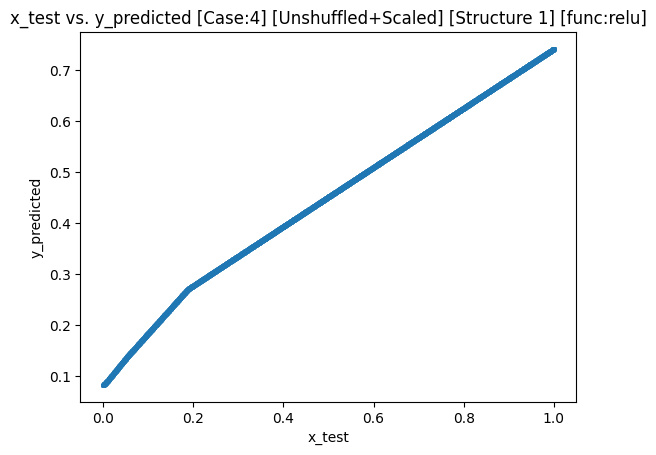



MAE:  0.06220841148166943
MSE:  0.005716915995390817
RMSE:  0.07561029027447796
R2 SCORE:  0.8428975940909205


In [ ]:
create_structure(1,'relu',3,number_of_epochs,batch_size,4)

### Case 5:
- Data: Use shuffled and scaled data. First, shuffle the data then split the data and finally
scale the data (both x and y).
- NN structure: Structure 1.
- Activation function: tanh

Data Shuffled
469/469 [==============================] - 1s 2ms/step


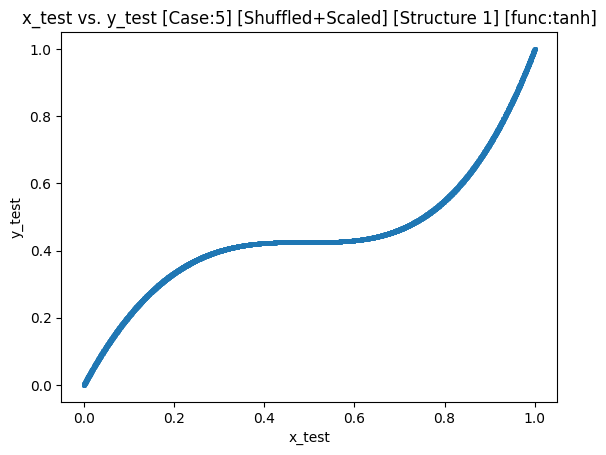

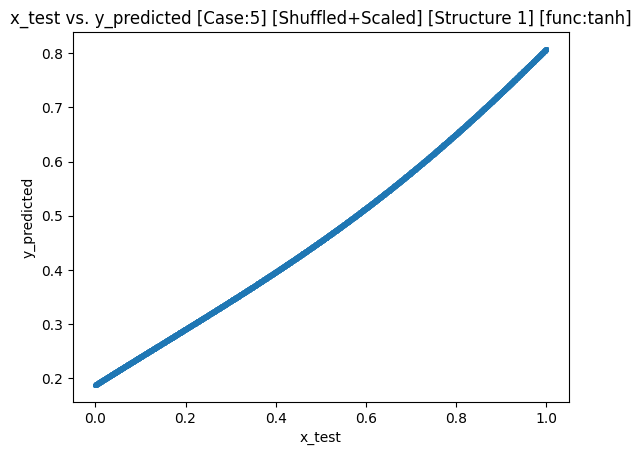



MAE:  0.06494709570653236
MSE:  0.005955139520824894
RMSE:  0.07716955047701712
R2 SCORE:  0.8346007933860712


In [ ]:
create_structure(1,'tanh',1,number_of_epochs,batch_size,5)

469/469 [==============================] - 1s 1ms/step


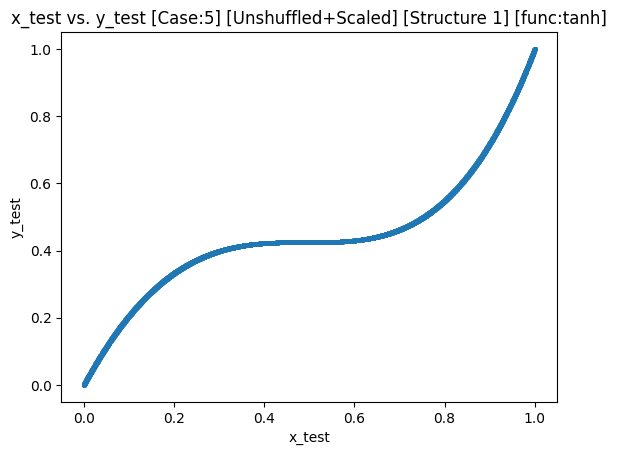

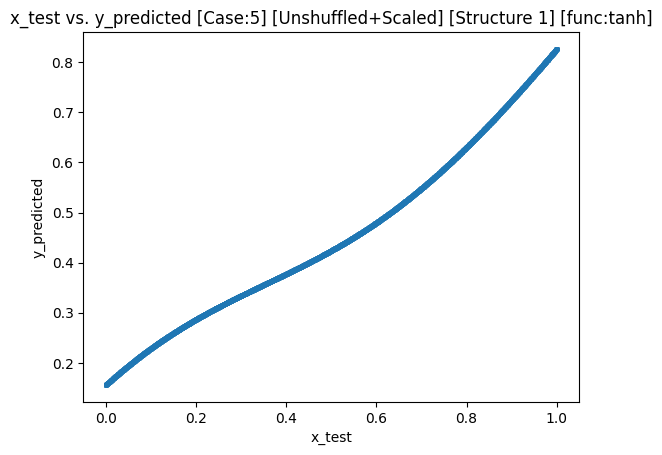



MAE:  0.055401057570594776
MSE:  0.0041714650672944305
RMSE:  0.06458687999349737
R2 SCORE:  0.8842436535186166


In [ ]:
create_structure(1,'tanh',3,number_of_epochs,batch_size,5)

### XOR Problem


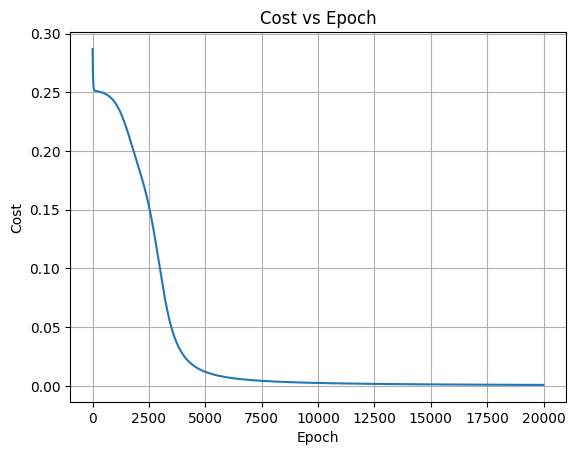

Actual predictions:
0.026790715487025957
0.9712969639531767
0.9712622578522168
0.035754099664043505
Apply: y>=0.5 --> 1:
0
1
1
0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return (1-1 / (1 + np.exp(-x)))*(1 / (1 + np.exp(-x)))

def plot_loss(loss,epochs):
    plt.plot(range(epochs), loss)
    plt.title('Cost vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

def stochastic_gradient_descent(x,y,W_1,W_2,epochs,a):
    #cost
    J=0
    cost=[0]*epochs
    for epoch in range(epochs):
      for i in range(len(x)):
        #forward propagation
        #step 1: initialize the req. variable
        x_0 = np.zeros((3, 1))
        x_0[0][0] = 1
        x_0[1][0] = x[i][0]
        x_0[2][0] = x[i][1]
        #step 2: W(1)^T*X_0
        s_1=W_1.T.dot(x_0)
        #Step 3: g(s_1)
        x_1=np.zeros((3,1))
        x_1[0][0]=1
        x_1[1:]=sigmoid(s_1)
        #step 4: W(2)^T*X_1
        s_2 = W_2.T.dot(x_1)
        #Step 5: g(s_2)
        x_2 = sigmoid(s_2)
        #back propagation
        #step 6: sens output layer
        l_2 = (x_2-y[i])*sigmoid_deriv(s_2)
        #step 7:sens input layer
        l_1 = sigmoid_deriv(s_1)*l_2*W_2[1:]
        #step 8: derv wrt to W1 and W2
        derv_wrt_W1 = x_0.dot(l_1.T)
        derv_wrt_W2 = x_1.dot(l_2.T)
        #step 9:update weight
        W_1 = W_1 -a*derv_wrt_W1
        W_2 = W_2 -a*derv_wrt_W2
        #step 10: cost
        J=J+(1/4)*(x_2.item()-y[i].item())**2
      cost[epoch] = J
      J=0
    plot_loss(cost,epochs)
    return W_1,W_2

def predict_y(x,W_1,W_2):
    predicted_y=[0]*len(x)
    for i in range(len(x)):
        #forward propagation
        #step 1: initialize the req. variable
        x_0 = np.zeros((3, 1))
        x_0[0][0] = 1
        x_0[1][0] = x[i][0]
        x_0[2][0] = x[i][1]
        #step 2: W(1)^T*X_0
        s_1=W_1.T.dot(x_0)
        #Step 3: g(s_1)
        x_1=np.zeros((3,1))
        x_1[0][0]=1
        x_1[1:]=sigmoid(s_1)
        #step 4: W(2)^T*X_1
        s_2 = W_2.T.dot(x_1)
        #Step 5: g(s_2)
        x_2 = sigmoid(s_2)
        predicted_y[i]= x_2.item()
    print("Actual predictions:")
    for i in range(len(predicted_y)):
      print(predicted_y[i])
    print("Apply: y>=0.5 --> 1:")
    actual_prediction=np.array(predicted_y)
    actual_prediction=(actual_prediction >= 0.5).astype(int)
    for i in range(len(predicted_y)):
      print(actual_prediction[i])

#initialize the req variable
x=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y=np.array([[0], [1], [1], [0]])
a = 0.1
np.random.seed(1)
W_1 = 2*np.random.random((3,2))-1
W_2 = 2*np.random.random((3,1))-1
epochs = 20000
#calculate new the weights
W_1,W_2=stochastic_gradient_descent(x,y,W_1,W_2,epochs,a)
#predict
predicted_y =predict_y(x,W_1,W_2)

In [ ]:
W_1 = np.array([[0.11,0.12],[0.21,0.08]])
W_2 = np.array([[0.14],[0.15]])
W_1,W_2 = st


array([[0.11, 0.12],
       [0.21, 0.08]])